This notebooko demonstrates the basic use of the EBL photon density class and how to load a model included in the package

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# Imports

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from ebltable.ebl_from_model import EBL
from ebltable.tau_from_model import OptDepth
import astropy.units as u

# Initiate the class

In [136]:
ebl =  EBL.readmodel(model = 'gilmore')
tau = OptDepth.readmodel()

Define some redshifts and energies for the interpolation:

In [137]:
z0 = 0.031
steps_z = 50
ETeV = np.logspace(-2,2,50)

## Calculate and plot mean free path

In [138]:
gam = ebl.mean_free_path(z0, ETeV)

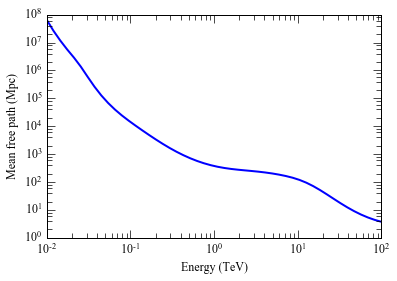

In [140]:
plt.loglog(ETeV,gam, lw = 2)
plt.gca().set_xlim(1e-2,1e2)
plt.gca().set_xlabel('Energy (TeV)')
plt.gca().set_ylabel('Mean free path (Mpc)')

In [150]:
## Calculate and plot optical depth w/ and w/o LIV

In [109]:
from time import time  as t

In [145]:
t0 = t()
# with LIV
tauLIV = ebl.optical_depth(z0,ETeV, LIV_scale=1e-7, nLIV=2)
#w/o LIV
tauCalc = ebl.optical_depth(z0,ETeV, LIV_scale=0.)
t1 = t()
print 'it took ', t1 - t0, 's'

it took  2.60383677483 s


### Do the plot

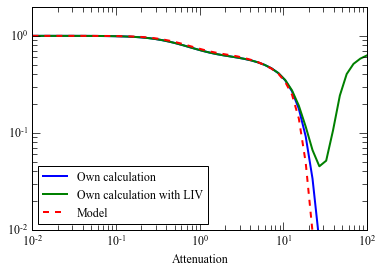

In [149]:
plt.loglog(ETeV,np.exp(-1. * tauCalc), lw = 2, label = 'Own calculation')
plt.loglog(ETeV,np.exp(-1. * tauLIV), lw = 2, label = 'Own calculation with LIV')
plt.loglog(ETeV,np.exp(-1. * tau.opt_depth(z0,ETeV)), lw = 2, ls = '--', 
           color = 'red', label = 'Model')

plt.legend(loc = 0)
plt.gca().set_ylim(1e-2,2)
plt.gca().set_xlabel('Energy (TeV)')
plt.gca().set_xlabel('Attenuation')

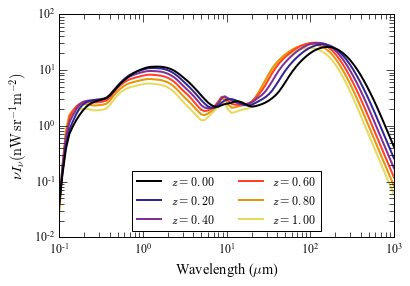

In [7]:
for i,zz in enumerate(z):
    plt.loglog(lmu,nuInu[i],
              ls = '-', color = plt.cm.CMRmap(i / float(len(z))),
               lw = 2.,
              label = '$z = {0:.2f}$'.format(zz), 
              zorder= -1 * i)
    
plt.gca().set_xlabel('Wavelength ($\mu$m)',size = 'x-large')
plt.gca().set_ylabel(r'$\nu I_\nu (\mathrm{nW}\,\mathrm{sr}^{-1}\mathrm{m}^{-2})$',size = 'x-large')
plt.legend(loc = 'lower center', ncol = 2)

## Plot the EBL photon density $dn / d\epsilon$ instead $\nu I_\nu$

convert the wavelength in micrometer to energy in eV:

In [8]:
EeV = (c.c.to(u.um / u.s) / (lmu * u.um) * c.h).to(u.eV).value

In [9]:
n = ebl.n_array(z,EeV)

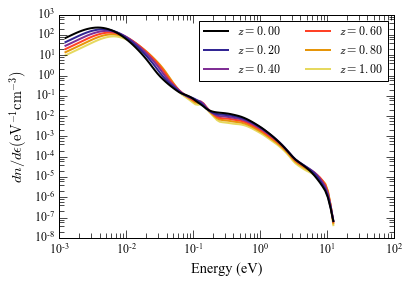

In [10]:
for i,zz in enumerate(z):
    plt.loglog(EeV,n[i],
              ls = '-', color = plt.cm.CMRmap(i / float(len(z))),
               lw = 2.,
              label = '$z = {0:.2f}$'.format(zz), 
              zorder= -1 * i)
plt.gca().set_xlabel('Energy (eV)',size = 'x-large')
plt.gca().set_ylabel(r'$dn/d\epsilon (\mathrm{eV}^{-1}\mathrm{cm}^{-3})$',size = 'x-large')
plt.legend(loc = 'upper right', ncol = 2)

Print the integrated EBL photon density:

In [11]:
ebl.ebl_int(0., lmin = 0.01, lmax = 1e3)

array([ 23.94366336])

Write the EBL values in a fits file:

In [12]:
ebl.writefits('out.fits', z, lmu)

Reread the fits file:

In [13]:
ebl.readfits("out.fits")